In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [ ]:
## Importing required libraries :
import pandas as pd
import numpy as np

# for removing accented and special chracters
import unicodedata

# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for calculating Polarity and Subjectivity
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
# function for making ngrams
from nltk.util import ngrams

# load in all the modules we're going to need #NLTK libraries
import nltk
import collections

# for Wordscloud
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## for resampling
from sklearn.utils import resample

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import set_config
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
df1=getDF("/content/drive/MyDrive/capstone_data/meta_Digital_Music.json.gz")
df1

,asin,title,price,imUrl,related,salesRank,categories,description,brand
0,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
1,6308051551,Don't Drink His Blood,8.91,http://ecx.images-amazon.com/images/I/31LT2n7Q...,NaN,NaN,"[[Digital Music, Alternative Rock, Indie & Lo-...",NEW Combo BLUWAVS CD and FLAC FILE,NaN
2,7901622466,On Fire,11.33,http://ecx.images-amazon.com/images/I/21W29WZw...,"{'also_bought': ['B00000282A', 'B0084O8O9S', '...",{'Music': 58799},"[[CDs & Vinyl, Christian, Rock & Alternative],...",NaN,NaN
3,B0000000ZW,Changing Faces,23.64,http://ecx.images-amazon.com/images/I/51H3Bp-3...,"{'also_bought': ['B00000010Z', 'B0000039Q5', '...",{'Music': 68784},"[[CDs & Vinyl, Dance & Electronic], [CDs & Vin...",,
4,B00000016W,Pet Sounds,9.49,http://ecx.images-amazon.com/images/I/51pDGkXj...,"{'also_bought': ['B0025KVLTM', 'B00007FOMP', '...",{'Music': 77205},"[[CDs & Vinyl, Classic Rock], [CDs & Vinyl, Po...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
279894,B00LPQOYIW,NaN,NaN,http://ecx.images-amazon.com/images/I/51qeT9Z7...,NaN,NaN,[[Digital Music]],NaN,NaN
279895,B00LTL4VGI,NaN,NaN,http://ecx.images-amazon.com/images/I/51NL8e7H...,NaN,NaN,[[Digital Music]],NaN,NaN
279896,B00LTFDZXE,NaN,NaN,http://ecx.images-amazon.com/images/I/61fkAKY8...,"{'also_bought': ['B00LWIJXH0', 'B00LC0HC62', '...",NaN,[[Digital Music]],NaN,NaN
279897,B00LWJDZHI,NaN,1.29,http://ecx.images-amazon.com/images/I/61THoSjo...,"{'also_bought': ['B00LWJDXTI', 'B00L0QWBF0', '...",NaN,[[Digital Music]],NaN,NaN


In [ ]:
df2=getDF("/content/drive/MyDrive/capstone_data/reviews_Digital_Music.json.gz")
df2

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,978480000,"01 3, 2001"
1,A1WR23ER5HMAA9,5555991584,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,953424000,"03 19, 2000"
2,A2IR4Q0GPAFJKW,5555991584,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1393545600,"02 28, 2014"
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,966124800,"08 13, 2000"
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,"12 7, 2001"
...,...,...,...,...,...,...,...,...,...
836001,A38NRGVVEF3950,B00LWJDZHI,gia r.,"[0, 0]",Amazing song from a amazing girl,5.0,Five Stars,1405641600,"07 18, 2014"
836002,A36ZEAXJ5HMQXA,B00LWJDZHI,Jenira,"[0, 0]",I Love it!!!BBN1334,5.0,Love it!!,1406073600,"07 23, 2014"
836003,A1840L5R4OPDE4,B00LWJDZHI,leo,"[0, 0]",Love it!!! I can see she is working hard to ge...,5.0,Chiquis Rivera &#128077;&#128077;,1405900800,"07 21, 2014"
836004,A1HGHLLGGGAQZX,B00LWJDZHI,Selene murillo,"[0, 0]",Love the song,5.0,Five Stars,1405814400,"07 20, 2014"


In [ ]:
## Here, we have merged df1 and df2 and created new file as df :

In [ ]:
df=df2.merge(df1,on="asin", how='left')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,title,price,imUrl,related,salesRank,categories,description,brand
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,978480000,"01 3, 2001",Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
1,A1WR23ER5HMAA9,5555991584,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,953424000,"03 19, 2000",Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
2,A2IR4Q0GPAFJKW,5555991584,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1393545600,"02 28, 2014",Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,966124800,"08 13, 2000",Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,"12 7, 2001",Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836001,A38NRGVVEF3950,B00LWJDZHI,gia r.,"[0, 0]",Amazing song from a amazing girl,5.0,Five Stars,1405641600,"07 18, 2014",NaN,1.29,http://ecx.images-amazon.com/images/I/61THoSjo...,"{'also_bought': ['B00LWJDXTI', 'B00L0QWBF0', '...",NaN,[[Digital Music]],NaN,NaN
836002,A36ZEAXJ5HMQXA,B00LWJDZHI,Jenira,"[0, 0]",I Love it!!!BBN1334,5.0,Love it!!,1406073600,"07 23, 2014",NaN,1.29,http://ecx.images-amazon.com/images/I/61THoSjo...,"{'also_bought': ['B00LWJDXTI', 'B00L0QWBF0', '...",NaN,[[Digital Music]],NaN,NaN
836003,A1840L5R4OPDE4,B00LWJDZHI,leo,"[0, 0]",Love it!!! I can see she is working hard to ge...,5.0,Chiquis Rivera &#128077;&#128077;,1405900800,"07 21, 2014",NaN,1.29,http://ecx.images-amazon.com/images/I/61THoSjo...,"{'also_bought': ['B00LWJDXTI', 'B00L0QWBF0', '...",NaN,[[Digital Music]],NaN,NaN
836004,A1HGHLLGGGAQZX,B00LWJDZHI,Selene murillo,"[0, 0]",Love the song,5.0,Five Stars,1405814400,"07 20, 2014",NaN,1.29,http://ecx.images-amazon.com/images/I/61THoSjo...,"{'also_bought': ['B00LWJDXTI', 'B00L0QWBF0', '...",NaN,[[Digital Music]],NaN,NaN


In [ ]:
##  Here ,day,year,month and date columns are created :

In [ ]:
new = df["reviewTime"].str.split(",", n = 1, expand = True)
df["date"]= new[0]
df["year"]= new[1]
df=df.drop(['reviewTime'], axis=1)
new1 = df["date"].str.split(" ", n = 1, expand = True) 
df["month"]= new1[0]
df["day"]= new1[1]
df=df.drop(['date'], axis=1)
cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [ ]:
## here Date is converted into a standard date format column :
df['date'] = pd.to_datetime(df['date'])  

In [ ]:
## here sentiment classification based on overall rating is done here :

In [ ]:
df.loc[df['overall']<3,'Sentiment'] = 0  
df.loc[df['overall']==3,'Sentiment'] = 1
df.loc[df['overall']>3,'Sentiment'] = 2 

def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
#Applying the function in our new column
df['sentiment1'] = df.apply(f, axis=1)

In [ ]:
## here we have created a helpfullrate column and dropped original helpful column by converting it into a usefula nd standar format:

In [ ]:
#Splitting the dataset based on comma and square bracket 
new1 = df["helpful"].astype(str).str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)


# I found few spaces in the records, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
df['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
df=df.drop(['helpful'], axis=1)

In [ ]:
## In this we are going to clean our reviews texts column for all the ana=omalies like special characters,numbers,brackets,linksetc

In [ ]:
##Review text-Punctuation Cleaning
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['reviewText']=df['reviewText'].apply(lambda x:review_cleaning(x))

In [ ]:
## now next step is to remove the stopwords for better and good results :

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [ ]:
#Removing stopwords
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,title,price,imUrl,...,categories,description,brand,year,month,day,date,Sentiment,sentiment1,helpful_rate
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",anthemic title track begins quotthe memory tre...,5.0,Enya Experiments And Succeeds,978480000,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,...,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,2001,01,3,2001-01-03,2.0,Positive,0.8
1,A1WR23ER5HMAA9,5555991584,AKB,thought enya couldnt possibly get better found...,5.0,How to improve upon perfection.,953424000,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,...,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,2000,03,19,2000-03-19,2.0,Positive,1.0
2,A2IR4Q0GPAFJKW,5555991584,Alexander,nice cd easy listening husband like quite bit ...,4.0,Good listening.,1393545600,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,...,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,2014,02,28,2014-02-28,2.0,Positive,0.0
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,really liked cd especially different languages...,4.0,Loved It,966124800,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,...,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,2000,08,13,2000-08-13,2.0,Positive,0.0
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""",enyas richly chorded style smitten little bit ...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,...,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,2001,12,7,2001-12-07,2.0,Positive,1.0


In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['reviewText'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
df['polarity'] = df['reviewText'].map(lambda text: TextBlob(text).sentiment.polarity)  ## polarity using text_blob

df['review_len'] = df['reviewText'].astype(str).apply(len)                             ## finding the length of reviews

df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))               ## count of words in the reviews

In [ ]:
### here i have to save the file to the drive or google in csv and get direct access from it so i will not consume ram much from it.

In [ ]:
df.to_csv("/content/drive/MyDrive/df_process_14:15.csv")

In [ ]:
#####################################################################################################################

In [ ]:
## Finding the info about the dataframe.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836006 entries, 0 to 836005
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      836006 non-null  object        
 1   asin            836006 non-null  object        
 2   reviewerName    833586 non-null  object        
 3   reviewText      836006 non-null  object        
 4   overall         836006 non-null  float64       
 5   summary         836006 non-null  object        
 6   unixReviewTime  836006 non-null  int64         
 7   title           233517 non-null  object        
 8   price           611466 non-null  float64       
 9   imUrl           835133 non-null  object        
 10  related         723905 non-null  object        
 11  salesRank       303574 non-null  object        
 12  categories      836006 non-null  object        
 13  description     279113 non-null  object        
 14  brand           102385 non-null  obj

In [ ]:
# lets check if the dataset has any Missing Values
df.isnull().sum()

reviewerID             0
asin                   0
reviewerName        2420
reviewText             0
overall                0
summary                0
unixReviewTime         0
title             602489
price             224540
imUrl                873
related           112101
salesRank         532432
categories             0
description       556893
brand             733621
year                   0
month                  0
day                    0
date                   0
Sentiment              0
sentiment1             0
helpful_rate           0
polarity               0
review_len             0
word_count             0
dtype: int64

In [ ]:
## Descibe the data
df.describe()

,overall,unixReviewTime,price,Sentiment,helpful_rate,polarity,review_len,word_count
count,836006.000000,8.360060e+05,611466.000000,836006.000000,836006.000000,836006.000000,836006.000000,836006.000000
mean,4.540250,1.296114e+09,9.233988,1.831568,0.238384,0.312825,267.001395,40.234875
std,0.958877,1.269207e+08,10.424750,0.508960,0.395131,0.240206,410.155911,59.525460
min,1.000000,8.852544e+08,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,4.000000,1.244938e+09,1.290000,2.000000,0.000000,0.162500,79.000000,13.000000
50%,5.000000,1.358294e+09,7.280000,2.000000,0.000000,0.300000,120.000000,19.000000
75%,5.000000,1.381190e+09,11.490000,2.000000,0.500000,0.466667,273.000000,42.000000
max,5.000000,1.406074e+09,117.780000,2.000000,1.000000,1.000000,22783.000000,3018.000000


In [ ]:
df['sentiment1'].value_counts()

Positive    744929
Negative     49733
Neutral      41344
Name: sentiment1, dtype: int64

In [ ]:
df.Sentiment.value_counts()

2.0    744929
0.0     49733
1.0     41344
Name: Sentiment, dtype: int64

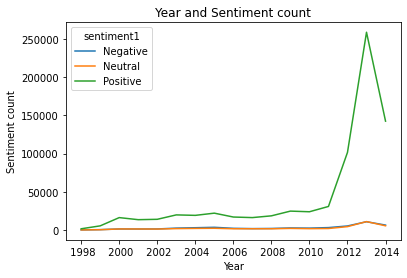

In [ ]:
df.groupby(['year','sentiment1'])['sentiment1'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [ ]:
###########################################################################################################################################################

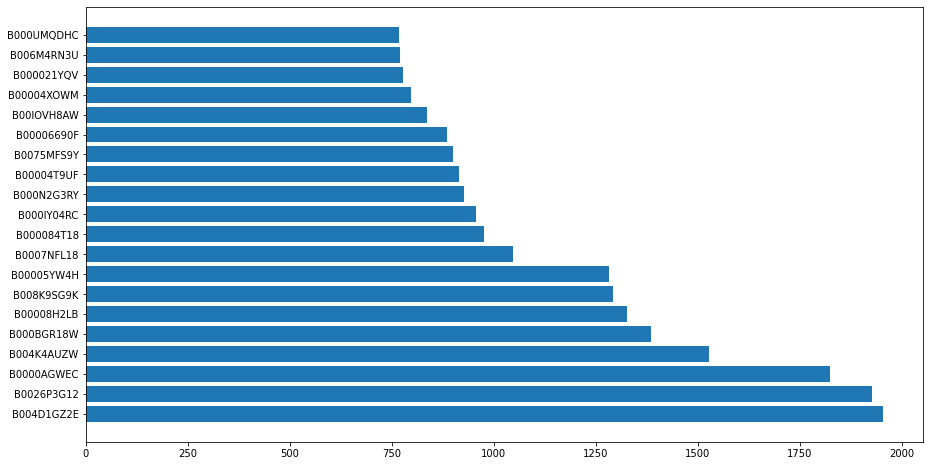

In [ ]:
## top 20 most reviewed products.
x=df.groupby(by="asin")["reviewerID"].count().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,8))
plt.barh(x.index,x.values)
plt.show()

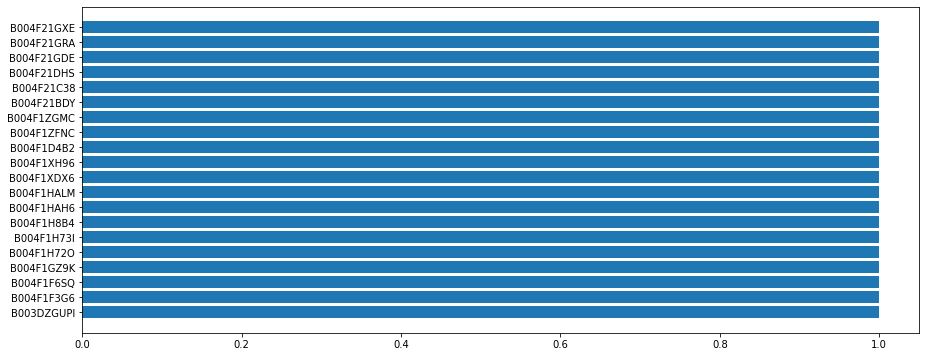

In [ ]:
## top 20 least reviewed products.
z=df.groupby(by="asin")["reviewerID"].count().sort_values(ascending=True).head(20)
plt.figure(figsize=(15,6))
plt.barh(z.index,z.values)
plt.show()

In [ ]:
#######################################################################################################################################################

# EDA

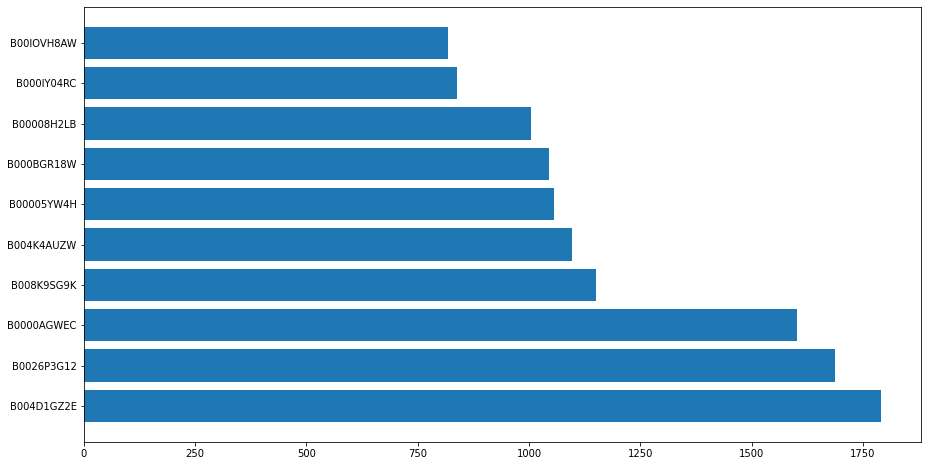

In [ ]:
### most positively reviewd products:
a=df2[["asin","overall"]][df2.overall > 3].groupby(by="asin")["overall"].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.barh(a.index,a.values)
plt.show()

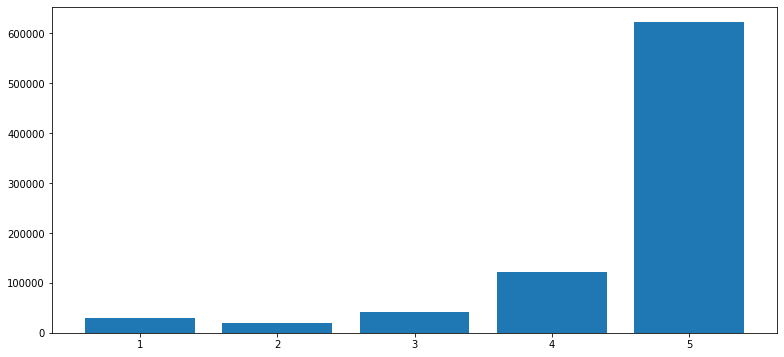

In [ ]:
## Which rating got highest number of reviews :
b=df2.groupby(by="overall")["reviewerID"].count().sort_values(ascending=False).head(20)
plt.figure(figsize=(13,6))
plt.bar(b.index,b.values)
plt.show()

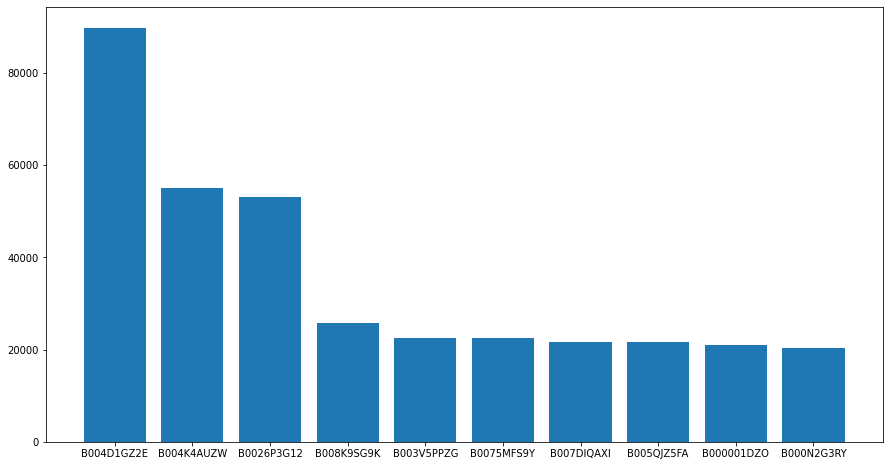

In [ ]:
##which product has given the highest sales:
c=df.groupby(by="asin")["price"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.bar(c.index,c.values)
plt.show()

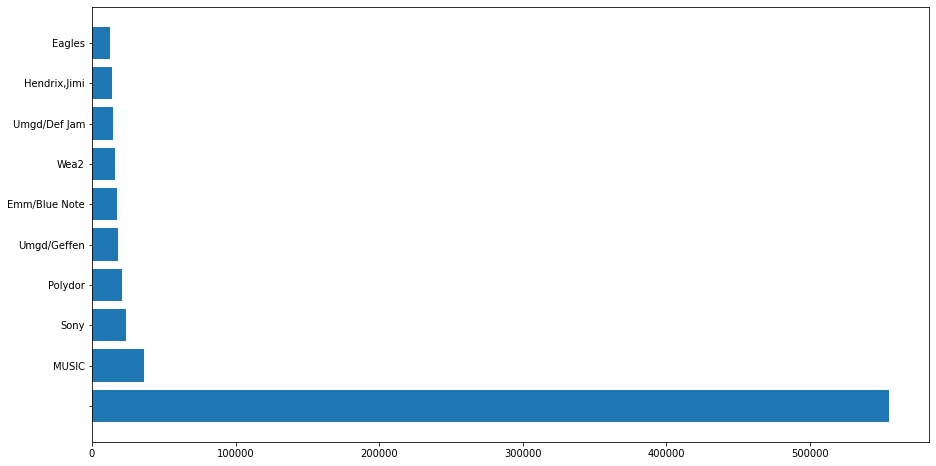

In [ ]:
## top 10 musical instruments brands which are having the highest sales.
d=df.groupby('brand')["price"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.barh(d.index,d.values)
plt.show()

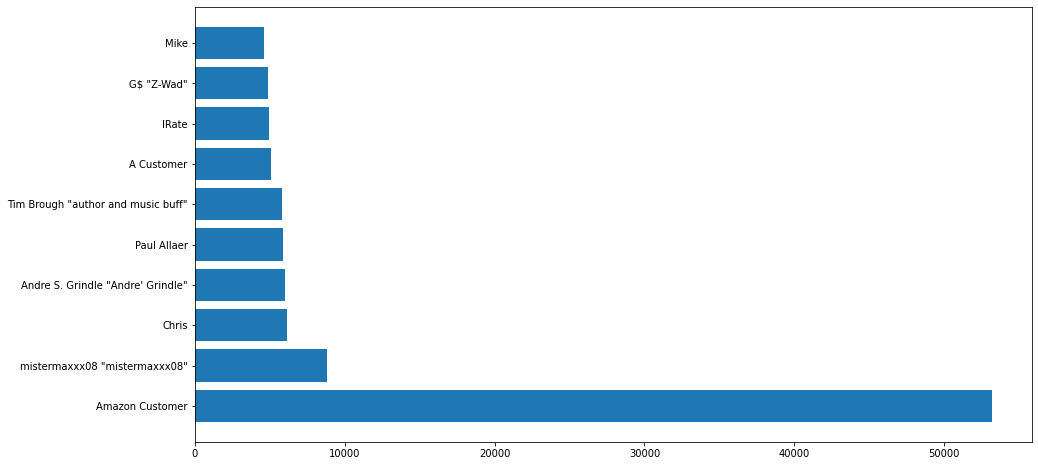

In [ ]:
## Top 10 customers which purchased a lot from these sites:
e=df.groupby('reviewerName')["price"].sum().sort_values(ascending=False).head(10) 
plt.figure(figsize=(15,8))
plt.barh(e.index,e.values)
plt.show()

In [ ]:
## Top 10 most reviewed brands:-

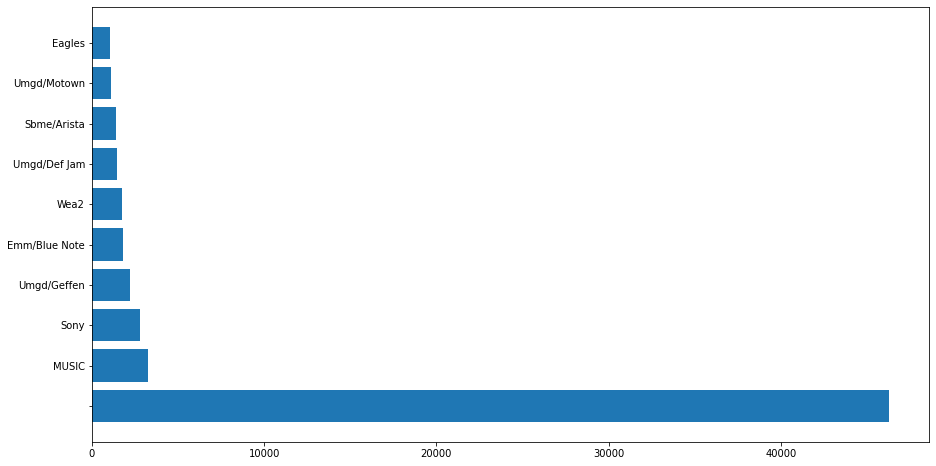

In [ ]:
f=df.groupby(["brand"])["reviewText"].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.barh(f.index,f.values)
plt.show()

In [ ]:
## Top 10 least reviewed brands :-

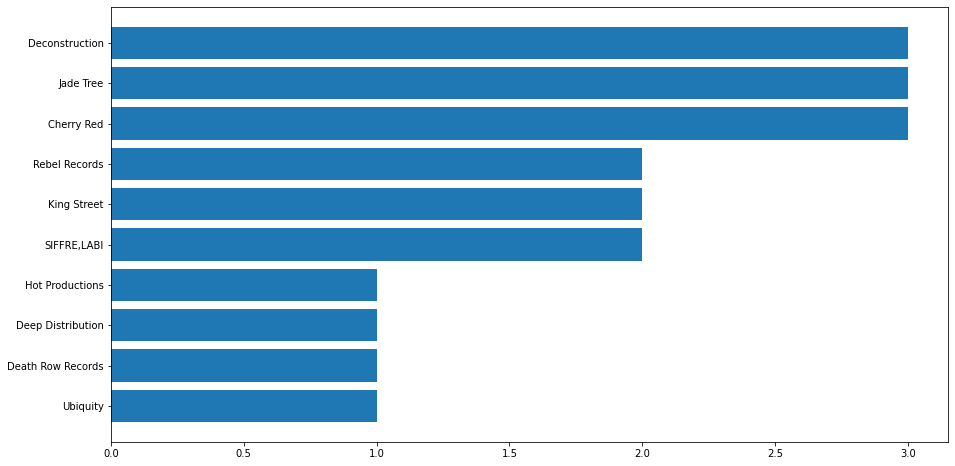

In [ ]:
g=df.groupby(["brand"])["reviewText"].count().sort_values(ascending=True).head(10)
plt.figure(figsize=(15,8))
plt.barh(g.index,g.values)
plt.show()

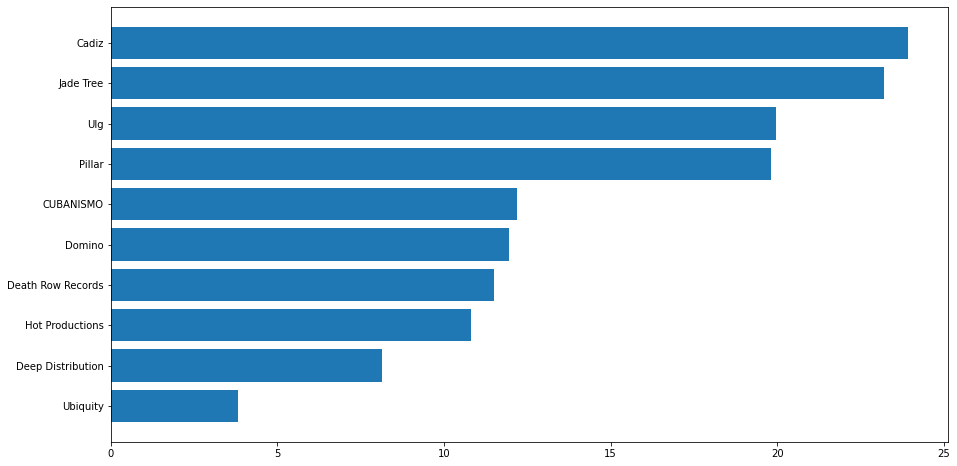

In [ ]:
## Top 10 brands having the lowest sales :
h=df.groupby(["brand"])["price"].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(15,8))
plt.barh(h.index,h.values)
plt.show()

In [ ]:
## Top 10 brands having the lowest sales :
df.groupby(["brand"])["price"].sum().sort_values(ascending=False).head(10)

brand
                 555057.18
MUSIC             36417.18
Sony              24036.80
Polydor           20895.00
Umgd/Geffen       18121.99
Emm/Blue Note     17371.62
Wea2              16100.06
Umgd/Def Jam      14985.07
Hendrix,Jimi      13672.35
Eagles            12612.36
Name: price, dtype: float64

In [ ]:
df.groupby(["date"])["price"].sum().sort_values(ascending=False).head(10)

date
2011-05-23    19106.95
2012-09-06    10319.94
2012-11-24     7997.77
2012-12-19     7445.47
2012-12-26     7408.12
2013-02-18     7051.07
2011-05-24     6760.64
2013-10-02     6166.65
2013-06-05     6042.67
2013-01-04     5884.29
Name: price, dtype: float64

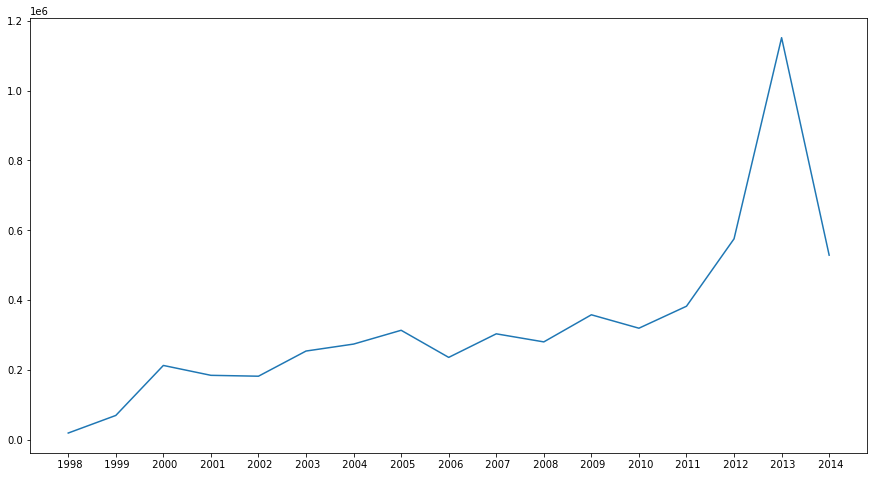

In [ ]:
j=df.groupby(["year"])["price"].sum().sort_index(ascending=True)
plt.figure(figsize=(15,8))
plt.plot(j.index,j.values)
plt.show()

In [ ]:
# Sales have increased from 1998 to 2013 ,after that decreased from 2013 due to recession in market.

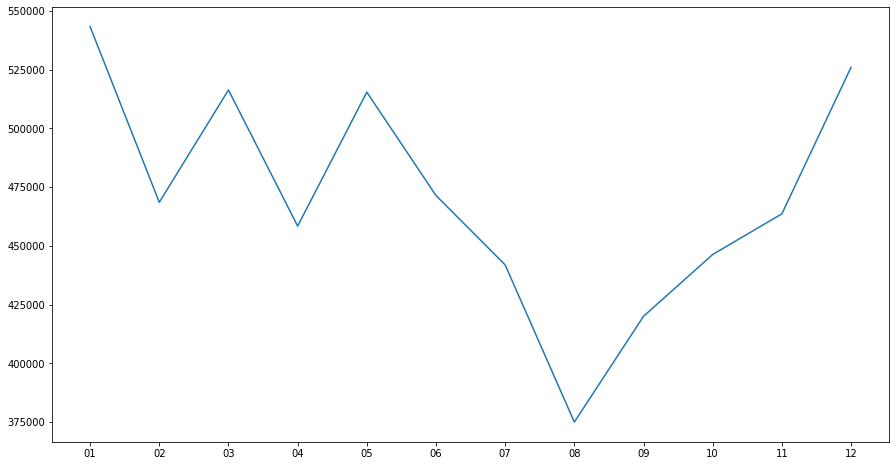

In [ ]:
i=df.groupby(["month"])["price"].sum().sort_index(ascending=True)
plt.figure(figsize=(15,8))
plt.plot(i.index,i.values)
plt.show()

<Figure size 1080x432 with 0 Axes>

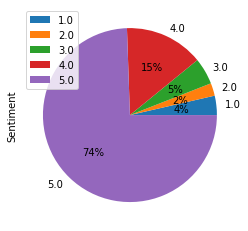

In [ ]:
## rating counts percentage :-
# Define the sentance to Plot the Pieplot 
# Define the sentance to Plot the Pieplot 

# Plotting the pie chart for above dataframe
plt.figure(figsize=(15,6))
df.groupby(['overall']).count().plot(kind='pie',y="Sentiment", autopct='%1.0f%%')
plt.show()


In [ ]:
pd.DataFrame(df.groupby('Sentiment')['helpful_rate'].mean())

,helpful_rate
Sentiment,
0.0,0.275157
1.0,0.256756
2.0,0.234909


In [ ]:
##############################################################################################################################################################

**Word** clouds for positive ,negative and neutral reviews.

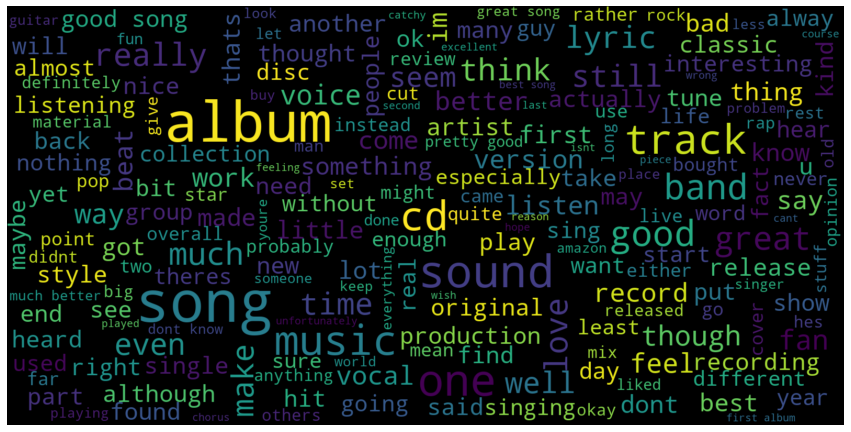

In [ ]:
consolidated = ' '.join(word for word in df['reviewText'][df['Sentiment'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#MUCH BETTER , EXCELLENT ,INTERESTING,GREAT,INTERESTING,FUN ,GOOD SONG,GREAT ,LIKED,HIT,CHORUS

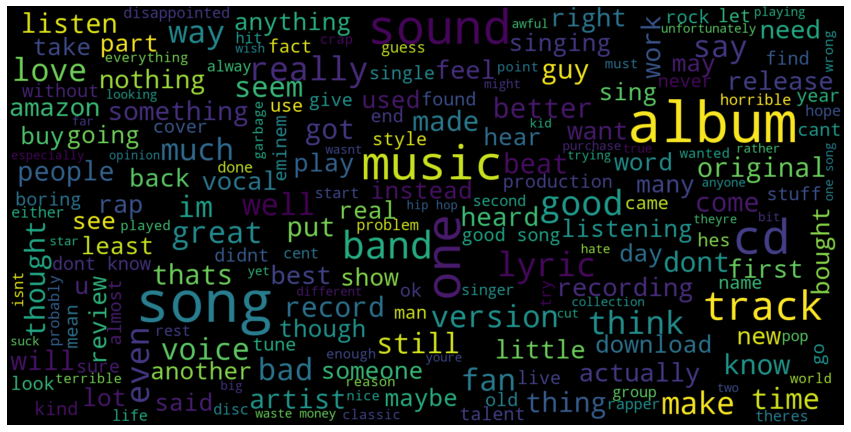

In [ ]:
consolidated = ' '.join(word for word in df['reviewText'][df['Sentiment'] == 0].astype(str))
wordCloud = WordCloud(width=1600, height=800,random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## in this we cam see lot of words like didnt,waste_money,terrible,cut,try,hate,garbage ,unfortunately,wrong wasnt negative words,boring,dont know

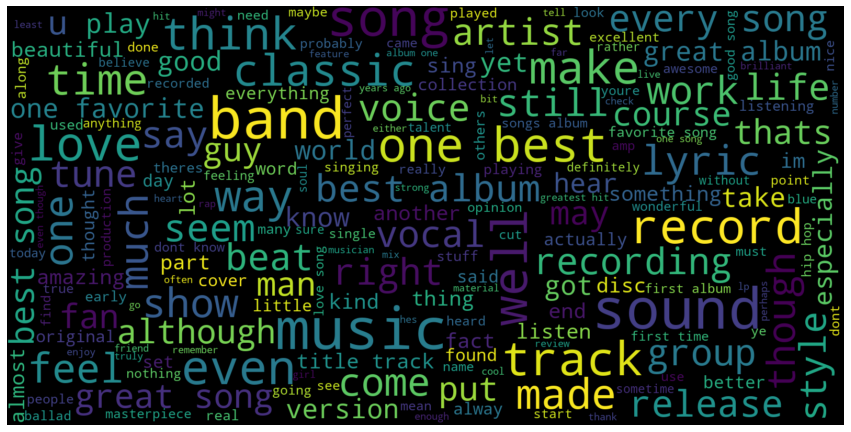

In [ ]:
consolidated = ' '.join(word for word in df['reviewText'][df['Sentiment'] == 2].head(150000).astype(str))

wordCloud = WordCloud(width=1600, height=800,random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

#creating new column scores using polarity scores function
df['polarity_vader']=df['reviewText'].apply(lambda reviewText: sia.polarity_scores(str(reviewText)))

df['compound']=df['polarity_vader'].apply(lambda score_dict:score_dict['compound'])
df['pos']=df['polarity_vader'].apply(lambda pos_dict:pos_dict['pos'])
df['neg']=df['polarity_vader'].apply(lambda neg_dict:neg_dict['neg'])
#df['review_type']=''
df.loc[df.compound>0,'type']='POS'
df.loc[df.compound==0,'type']='NEUTRAL'      ## use this review type for classification of reviews based on vader polarity approach
df.loc[df.compound<0,'type']='NEG'

df.drop(columns=["unixReviewTime","title","salesRank","imUrl","related","categories","description"],inplace=True)
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,price,brand,year,...,sentiment1,helpful_rate,polarity,review_len,word_count,polarity_vader,compound,pos,neg,type
0,0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",anthemic title track begins quotthe memory tre...,5.0,Enya Experiments And Succeeds,9.49,NaN,2001,...,Positive,0.8,0.137327,1806,256,"{'neg': 0.079, 'neu': 0.621, 'pos': 0.301, 'co...",0.9980,0.301,0.079,POS
1,1,A1WR23ER5HMAA9,5555991584,AKB,thought enya couldnt possibly get better found...,5.0,How to improve upon perfection.,9.49,NaN,2000,...,Positive,1.0,0.560000,306,42,"{'neg': 0.104, 'neu': 0.472, 'pos': 0.425, 'co...",0.9722,0.425,0.104,POS
2,2,A2IR4Q0GPAFJKW,5555991584,Alexander,nice cd easy listening husband like quite bit ...,4.0,Good listening.,9.49,NaN,2014,...,Positive,0.0,0.577778,73,12,"{'neg': 0.0, 'neu': 0.413, 'pos': 0.587, 'comp...",0.8850,0.587,0.000,POS
3,3,A2V0KUVAB9HSYO,5555991584,Alison Hight,really liked cd especially different languages...,4.0,Loved It,9.49,NaN,2000,...,Positive,0.0,0.378571,169,25,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.7501,0.218,0.000,POS
4,4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""",enyas richly chorded style smitten little bit ...,5.0,Another Hauntingly Beautiful Collection of Songs,9.49,NaN,2001,...,Positive,1.0,0.322348,460,67,"{'neg': 0.027, 'neu': 0.683, 'pos': 0.29, 'com...",0.9693,0.290,0.027,POS


In [ ]:
df.to_csv("/content/drive/MyDrive/df_processed_new.csv") #for saving this file

In [ ]:
##########################################################################################################################

In [ ]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)

In [ ]:
### WORD CLOUDS FOR POSITIVE,NEGATIVE AND NEUTRAL SENTIMENTS MOST REPEATED 30 WORDS.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.probability import FreqDist

# Create a list of trigrams from the positive reviews
positive_trigrams = []
for index, row in df.iterrows():
    if row["type"] == "POS":
        positive_trigrams.extend(nltk.trigrams(nltk.word_tokenize(row["reviewText"])))

# Create a frequency distribution of all the positive trigrams
positive_fdist = FreqDist(positive_trigrams)

# Extract the most common positive trigrams
common_positive_trigrams = positive_fdist.most_common(30)

# Print the most common positive trigrams
print("Common positive trigrams: ", common_positive_trigrams)

# Create a list of trigrams from the negative reviews
negative_trigrams = []
for index, row in df.iterrows():
    if row["type"] == "NEG":
        negative_trigrams.extend(nltk.trigrams(nltk.word_tokenize(row["reviewText"])))

# Create a frequency distribution of all the negative trigrams
negative_fdist = FreqDist(negative_trigrams)

# Extract the most common negative trigrams
common_negative_trigrams = negative_fdist.most_common(30)

# Print the most common negative trigrams
print("Common negative trigrams: ", common_negative_trigrams)

# Create a list of trigrams from the neutral reviews
neutral_trigrams = []
for index, row in df.iterrows():
    if row["type"] == "NEUTRAL":
        neutral_trigrams.extend(nltk.trigrams(nltk.word_tokenize(row["reviewText"])))

# Create a frequency distribution of all the neutral trigrams
neutral_fdist = FreqDist(neutral_trigrams)

# Extract the most common neutral trigrams
common_neutral_trigrams = neutral_fdist.most_common(30)

# Print the most common neutral trigrams
print("Common neutral trigrams: ", common_neutral_trigrams)


Common positive trigrams:  [(('one', 'favorite', 'songs'), 4561), (('first', 'time', 'heard'), 4436), (('one', 'best', 'songs'), 3657), (('ive', 'ever', 'heard'), 3442), (('one', 'best', 'albums'), 3245), (('love', 'love', 'love'), 3063), (('cant', 'go', 'wrong'), 2627), (('first', 'heard', 'song'), 2585), (('cant', 'help', 'but'), 2548), (('rock', 'n', 'roll'), 2398), (('great', 'song', 'great'), 2243), (('every', 'time', 'hear'), 2167), (('im', 'not', 'sure'), 2150), (('cant', 'get', 'enough'), 2093), (('will', 'not', 'disappointed'), 2026), (('dont', 'get', 'wrong'), 1993), (('would', 'recommend', 'anyone'), 1949), (('if', 'youre', 'looking'), 1934), (('really', 'like', 'song'), 1864), (('cant', 'stop', 'listening'), 1821), (('would', 'highly', 'recommend'), 1805), (('every', 'song', 'album'), 1797), (('cant', 'wait', 'hear'), 1791), (('never', 'get', 'tired'), 1709), (('if', 'youre', 'fan'), 1556), (('cant', 'wait', 'see'), 1513), (('every', 'time', 'listen'), 1506), (('best', 'son

In [ ]:
positive_trigrams_string = ' '.join([' '.join(trigram) for trigram, count in common_positive_trigrams])
positive_wordcloud = WordCloud(width=800, height=400, max_words=30, background_color='white').generate_from_text(positive_trigrams_string)

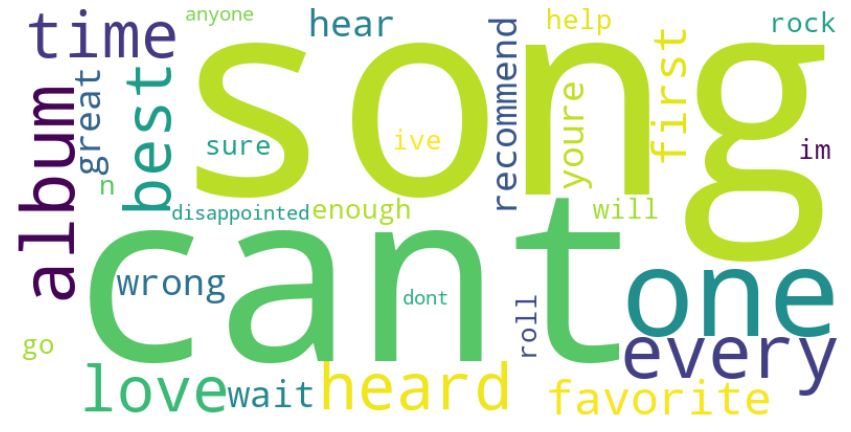

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

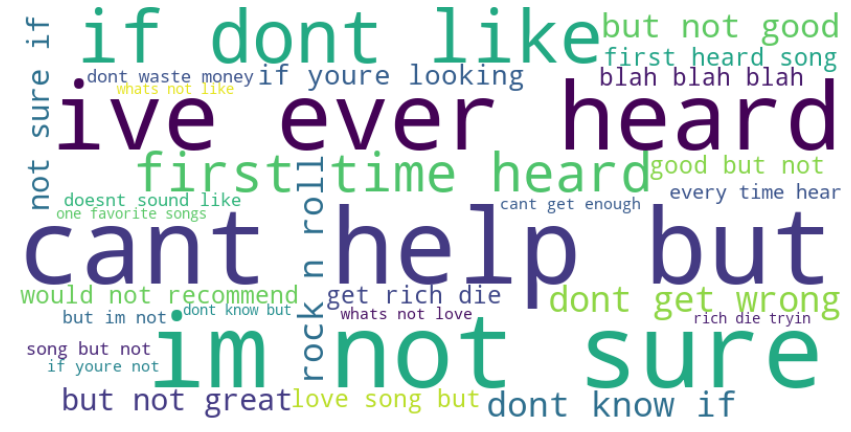

In [ ]:
# Create a wordcloud from the most common negative trigrams
negative_trigrams_dict = {' '.join(k): v for k, v in common_negative_trigrams}
negative_wordcloud = WordCloud(width=800, height=400, max_words=30, background_color='white').generate_from_frequencies(negative_trigrams_dict)

#Show the wordcloud
plt.figure(figsize=(15,8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


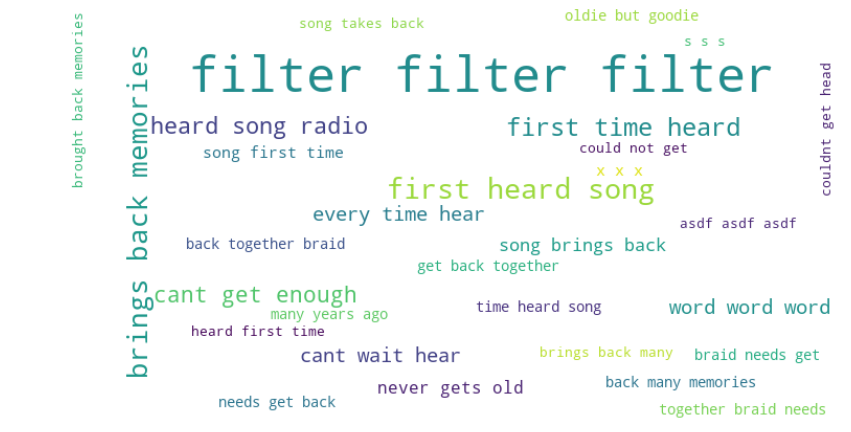

In [ ]:
# Create a wordcloud from the most common neutral trigrams
neutral_trigrams_dict = {' '.join(k): v for k, v in common_neutral_trigrams}
neutral_wordcloud = WordCloud(width=800, height=400, max_words=30, background_color='white').generate_from_frequencies(neutral_trigrams_dict)

# Show the wordcloud
plt.figure(figsize=(15,8))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()